# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&units=metric&q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | chicama
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | nikel
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | ulladulla
Processing Record 7 of Set 1 | guasdualito
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | oro valley
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | samarai
Processing Record 14 of Set 1 | port moresby
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | kingaroy
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | ko samui
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | lolua
City not found. Skipping...
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. 

Processing Record 34 of Set 4 | kununurra
Processing Record 35 of Set 4 | basco
Processing Record 36 of Set 4 | maniitsoq
Processing Record 37 of Set 4 | jiwani
Processing Record 38 of Set 4 | sakaiminato
Processing Record 39 of Set 4 | planadas
Processing Record 40 of Set 4 | morondava
Processing Record 41 of Set 4 | changji
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | oktyabrskiy
Processing Record 46 of Set 4 | trabzon
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | kuminskiy
Processing Record 49 of Set 4 | rafaela
Processing Record 0 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | baoning
Processing Record 3 of Set 5 | straumen
Processing Record 4 of Set 5 | havre-saint-pierre
Processing Record 5 of Set 5 | starodub
Processing Record 6 of Set 5 | warqla
City not f

Processing Record 20 of Set 8 | bugembe
Processing Record 21 of Set 8 | oktyabrskoye
Processing Record 22 of Set 8 | darhan
Processing Record 23 of Set 8 | chojnice
Processing Record 24 of Set 8 | illapel
Processing Record 25 of Set 8 | sihora
Processing Record 26 of Set 8 | sar-e pul
Processing Record 27 of Set 8 | zelenets
Processing Record 28 of Set 8 | eldorado
Processing Record 29 of Set 8 | bokoro
Processing Record 30 of Set 8 | mawlaik
Processing Record 31 of Set 8 | hami
Processing Record 32 of Set 8 | swidwin
Processing Record 33 of Set 8 | marsh harbour
Processing Record 34 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 8 | jalu
Processing Record 36 of Set 8 | siero
Processing Record 37 of Set 8 | chara
Processing Record 38 of Set 8 | tefe
Processing Record 39 of Set 8 | vakhrushev
Processing Record 40 of Set 8 | salamanca
Processing Record 41 of Set 8 | golden
Processing Record 42 of Set 8 | saint anthony
Processing Record 43 of Set 8 | camargo
P

Processing Record 10 of Set 12 | toplita
City not found. Skipping...
Processing Record 11 of Set 12 | shingu
Processing Record 12 of Set 12 | katsuura
Processing Record 13 of Set 12 | riviere-au-renard
Processing Record 14 of Set 12 | asifabad
Processing Record 15 of Set 12 | maceio
Processing Record 16 of Set 12 | labuan
Processing Record 17 of Set 12 | bonavista
Processing Record 18 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 19 of Set 12 | tucuman
Processing Record 20 of Set 12 | dana point
Processing Record 21 of Set 12 | shenjiamen
Processing Record 22 of Set 12 | bodden town
Processing Record 23 of Set 12 | rolla
Processing Record 24 of Set 12 | elizabeth city
Processing Record 25 of Set 12 | egvekinot
Processing Record 26 of Set 12 | santa isabel do rio negro
Processing Record 27 of Set 12 | yaan
Processing Record 28 of Set 12 | havelock
Processing Record 29 of Set 12 | champasak
Processing Record 30 of Set 12 | casablanca
Processing Record 31 of Set 12 | 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [9]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chicama,-7.8447,-79.1469,26.30,73,90,2.50,PE,1681518509
1,castro,-24.7911,-50.0119,15.63,98,27,0.71,BR,1681518509
2,nikel,69.4128,30.2220,0.10,88,6,4.60,RU,1681518510
3,busselton,-33.6500,115.3333,15.29,67,95,3.30,AU,1681518510
4,ulladulla,-35.3500,150.4667,20.18,55,32,3.06,AU,1681518510
...,...,...,...,...,...,...,...,...,...
566,veraval,20.9000,70.3667,24.71,80,0,4.16,IN,1681518676
567,mayo,38.8876,-76.5119,23.45,84,0,3.60,US,1681518677
568,hondo,32.4500,130.2000,18.20,97,100,5.60,JP,1681518677
569,ximei,24.9639,118.3794,28.06,59,13,2.16,CN,1681518677


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chicama,-7.8447,-79.1469,26.30,73,90,2.50,PE,1681518509
1,castro,-24.7911,-50.0119,15.63,98,27,0.71,BR,1681518509
2,nikel,69.4128,30.2220,0.10,88,6,4.60,RU,1681518510
3,busselton,-33.6500,115.3333,15.29,67,95,3.30,AU,1681518510
4,ulladulla,-35.3500,150.4667,20.18,55,32,3.06,AU,1681518510


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

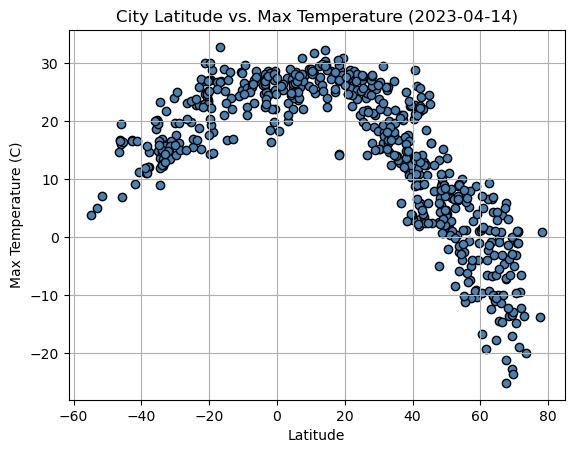

In [67]:
# Build scatter plot for latitude vs. temperature
x_values = [city['Lat'] for city in city_data]
y_values = [city['Max Temp'] for city in city_data]
plt.scatter(x_values,y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-04-14)')
plt.grid(True)

# Incorporate the other graph properties

# Save the figure
plt.savefig('../output_data/Fig1.png')

# Show plot
plt.show()


#### Latitude Vs. Humidity

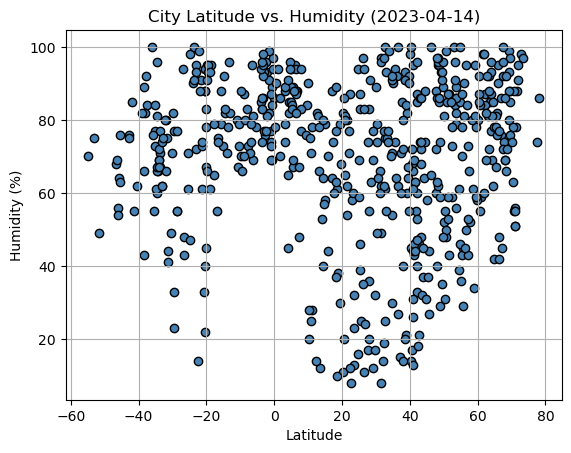

In [68]:
# Build the scatter plots for latitude vs. humidity
x_values = [city['Lat'] for city in city_data]
y_values = [city['Humidity'] for city in city_data]
plt.scatter(x_values,y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-04-14)')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

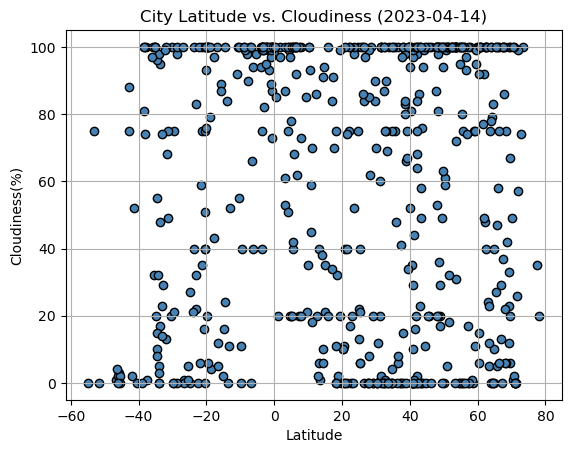

In [69]:
# Build the scatter plots for latitude vs. cloudiness
x_values = [city['Lat'] for city in city_data]
y_values = [city['Cloudiness'] for city in city_data]
plt.scatter(x_values,y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (2023-04-14)')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

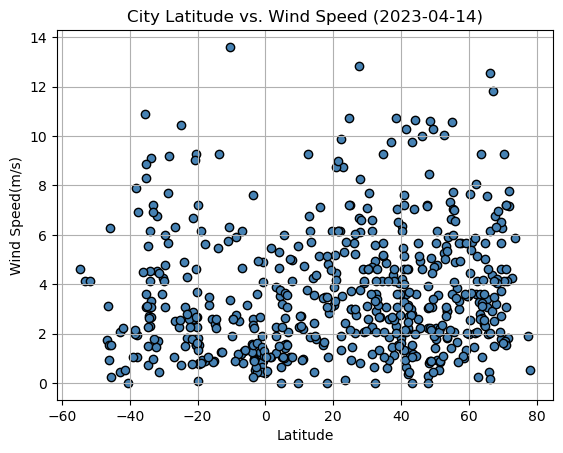

In [70]:
# Build the scatter plots for latitude vs. wind speed
x_values = [city['Lat'] for city in city_data]
y_values = [city['Wind Speed'] for city in city_data]
plt.scatter(x_values,y_values, marker="o", facecolors="steelblue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs. Wind Speed (2023-04-14)')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [2]:
# Define a function to create Linear Regression plots

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nikel,69.4128,30.2220,0.10,88,6,4.60,RU,1681518510
5,guasdualito,7.2424,-70.7324,31.00,48,20,1.03,VE,1681518511
8,oro valley,32.3909,-110.9665,25.36,19,1,4.92,US,1681518432
9,tasiilaq,65.6145,-37.6368,0.09,82,47,1.97,GL,1681518512
13,tuktoyaktuk,69.4541,-133.0374,-17.00,85,20,5.66,CA,1681518513


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chicama,-7.8447,-79.1469,26.30,73,90,2.50,PE,1681518509
1,castro,-24.7911,-50.0119,15.63,98,27,0.71,BR,1681518509
3,busselton,-33.6500,115.3333,15.29,67,95,3.30,AU,1681518510
4,ulladulla,-35.3500,150.4667,20.18,55,32,3.06,AU,1681518510
6,rikitea,-23.1203,-134.9692,25.88,72,22,4.31,PF,1681518512


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8750421287008662


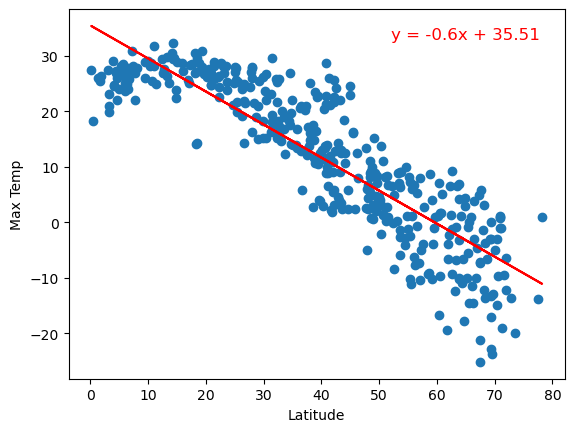

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='right', va='top')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.7599217772008983


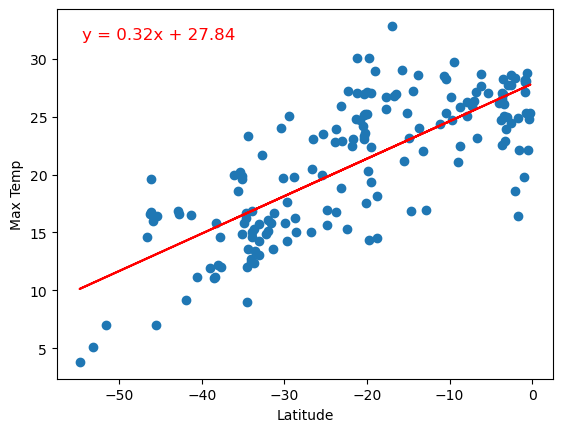

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='left', va='top')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** In Northern Hemisphere, the r-value is -0.87, meaning the Latitude and Max Temperature is showing a strong negative correlation. As Latitude increases, the Max Temperature decreases. The situation is completely the opposite for Southern Hemisphere. The r-value is 0.76, showing a strong positive correlation. The higher the Latitude, the higher the Max Temperature a city has. Since Latitude 0 is the equatorial, the closer a city is to the equatorial, the higher Max Temperature it has.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.128797200918222


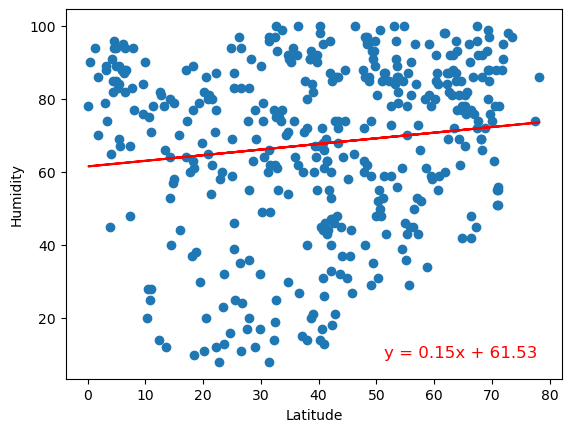

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0.95, 0.05), xycoords='axes fraction', fontsize=12, color='red', ha='right', va='bottom')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.34979142935514573


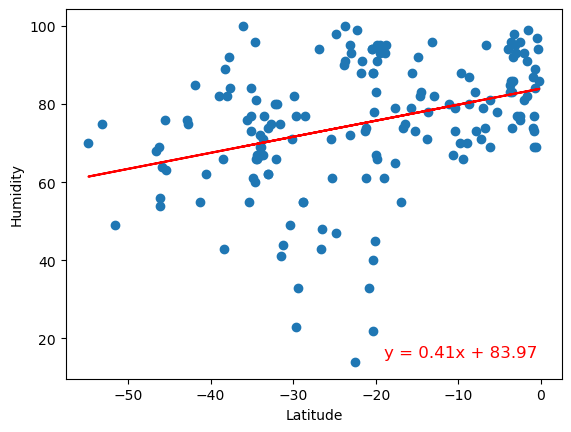

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0.95, 0.05), xycoords='axes fraction', fontsize=12, color='red', ha='right', va='bottom')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The r-value for Northern Hemisphere and Southern Hemisphere are 0.12 and 0.35, both showing relative weak correlation between Latitude and Humidity. The Humidity of a city is slightly impacted by it's Latitude and if this city has higher Latitude, it doesn't necessarily meaning it's humidity is higher.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.008207657055287535


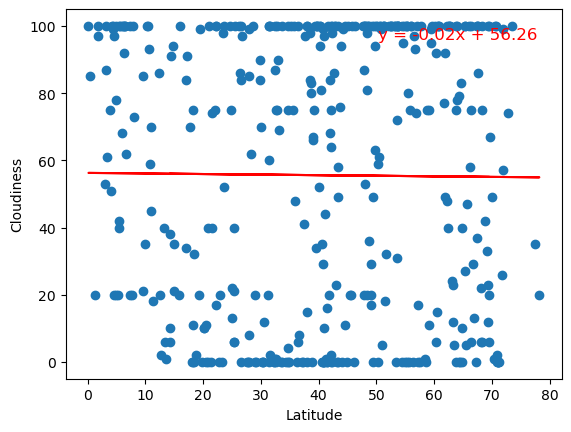

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='right', va='top')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.4556285445358821


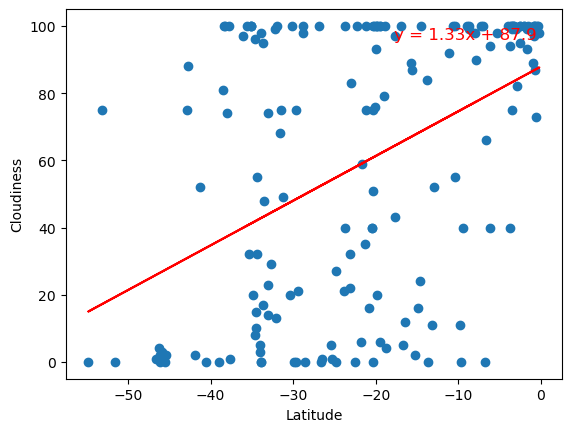

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='right', va='top')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The r-value for Northern Hemisphere is -0.008, which means the relationship of Cloudiness is very weak. However, the relationship of these two variables are stronger in Southern Hemisphere with r-value of 0.46. The difference may come from the sample pulled.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11398997945852246


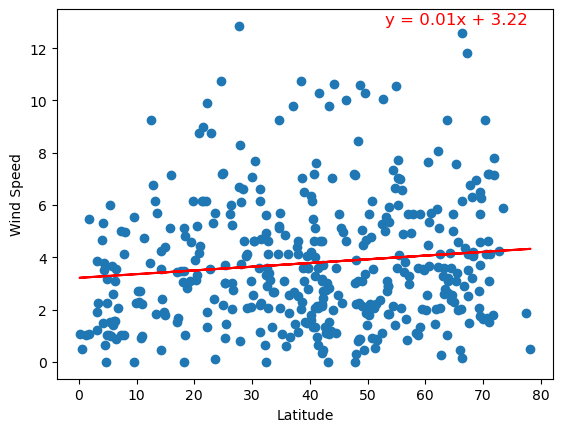

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='right', va='bottom')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.19104606813058142


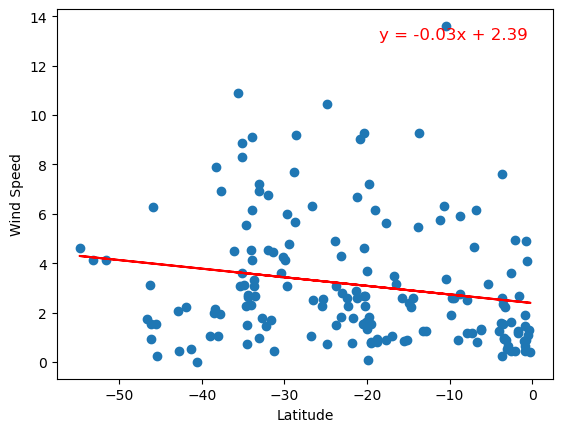

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='right', va='top')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The r-value of Northern Hemisphere is 0.11, showing a very weak positive correlation of Latitude and Wind Spead. Meanwhile, the r-value of Southern Hemishere is -0.19, showing a very weak negative correlation. This means the Wind Spead is not impacted heavily by it's Latitude.